https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance?select=PdM_failures.csv
https://github.com/Azure/AI-PredictiveMaintenance/tree/master/docs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data


## Telemetry

Telemetry Time Series Data (PdM_telemetry.csv): It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

In [2]:
df_telemetry = pd.read_csv("./dataset/raw/PdM_telemetry.csv")
print(df_telemetry.shape)
df_telemetry.sample(3)

(876100, 6)


,datetime,machineID,volt,rotate,pressure,vibration
575980,2015-09-29 17:00:00,66,189.207347,452.076778,98.684427,32.591383
711455,2015-03-17 20:00:00,82,151.923954,458.711320,106.008443,35.032986
763200,2015-02-11 15:00:00,88,156.748323,439.256342,111.133877,37.513139


## Machines

Metadata of Machines (PdM_Machines.csv): Model type & age of the Machines.

In [3]:
df_machines = pd.read_csv("./dataset/raw/PdM_machines.csv")
print(df_machines.shape)
df_machines.sample(3)

(100, 3)


,machineID,model,age
13,14,model3,1
34,35,model1,17
93,94,model2,18


### Machine models

Number of machines of each model

In [4]:
n_models = df_machines['model'].unique()
print(n_models)

['model3' 'model4' 'model2' 'model1']


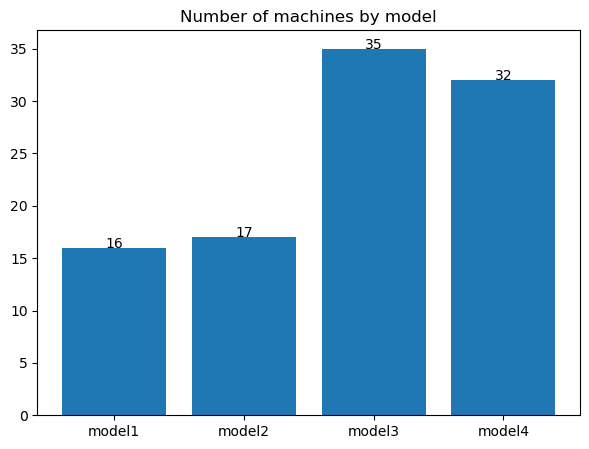

In [5]:
plt.figure(figsize=(7,5))
x, y = df_machines.groupby('model').count()['machineID'].index, df_machines.groupby('model').count()['machineID'].values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of machines by model')
plt.show()

### Oldest machines

In [6]:
df_machines['age'][df_machines['age'] == max(df_machines['age'])]

6     20
23    20
29    20
61    20
63    20
72    20
97    20
Name: age, dtype: int64

### Youngest machines

In [7]:
df_machines['age'][df_machines['age'] == min(df_machines['age'])]

38    0
Name: age, dtype: int64

## Errors

Error (PdM_errors.csv): These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [8]:
df_errors = pd.read_csv("./dataset/raw/PdM_errors.csv")
print(df_errors.shape)
df_errors.sample(3)

(3919, 3)


,datetime,machineID,errorID
3153,2015-12-12 06:00:00,81,error3
162,2015-10-05 06:00:00,5,error2
2158,2015-08-21 14:00:00,56,error4


### Machine with most errors

In [9]:
machine_error = df_errors.groupby("machineID").count()["errorID"]
machine_error[machine_error == max(machine_error)]

machineID
22    60
Name: errorID, dtype: int64

### Errors ID

Quantity of each type of error

In [10]:
n_errors = df_errors['errorID'].unique()
print(n_errors)

['error1' 'error3' 'error5' 'error4' 'error2']


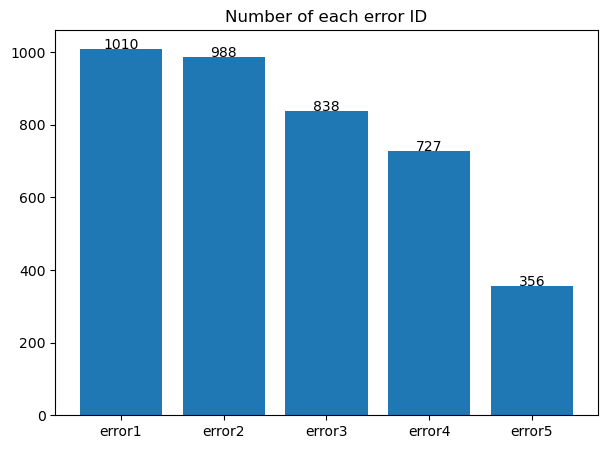

In [11]:
plt.figure(figsize=(7,5))
x, y = df_errors.groupby('errorID').count()['machineID'].index, df_errors.groupby('errorID').count()['machineID'].values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of each error ID')
plt.show()

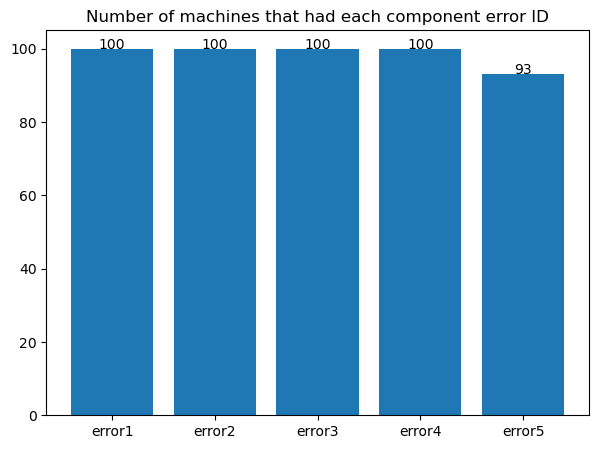

In [12]:
plt.figure(figsize=(7,5))
x, y = df_errors.groupby('errorID')['machineID'].nunique().index, df_errors.groupby('errorID')['machineID'].nunique().values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of machines that had each component error ID')
plt.show()

## Failures

Failures (PdM_failures.csv): Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [13]:
df_failures = pd.read_csv("./dataset/raw/PdM_failures.csv")
print(df_failures.shape)
df_failures.sample(3)

(761, 3)


,datetime,machineID,failure
300,2015-06-18 06:00:00,40,comp2
273,2015-04-19 06:00:00,37,comp4
611,2015-02-19 06:00:00,84,comp1


### Machine with the most failures

In [14]:
machine_failure = df_failures.groupby("machineID").count()["failure"]
machine_failure[machine_failure == max(machine_failure)]

machineID
99    19
Name: failure, dtype: int64

### Component failure

Quantity of each component failure

In [15]:
n_failure = df_failures['failure'].unique()
print(n_failure)

['comp4' 'comp1' 'comp2' 'comp3']


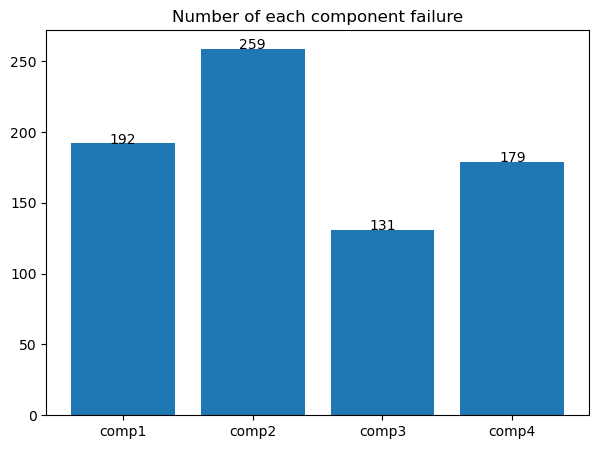

In [16]:
plt.figure(figsize=(7,5))
x, y = df_failures.groupby('failure').count()['machineID'].index, df_failures.groupby('failure').count()['machineID'].values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of each component failure')
plt.show()

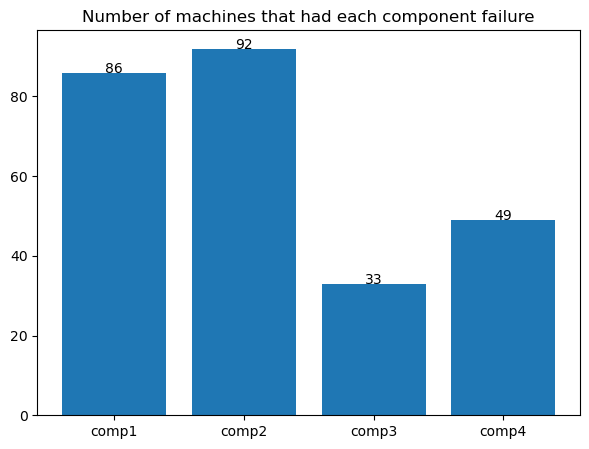

In [17]:
plt.figure(figsize=(7,5))
x, y = df_failures.groupby('failure')['machineID'].nunique().index, df_failures.groupby('failure')['machineID'].nunique().values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of machines that had each component failure')
plt.show()

## Maintenance

Maintenance (PdM_maint.csv): If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [18]:
df_maint = pd.read_csv("./dataset/raw/PdM_maint.csv")
print(df_maint.shape)
df_maint.sample(3)

(3286, 3)


,datetime,machineID,comp
2684,2015-05-13 06:00:00,82,comp3
1168,2015-03-08 06:00:00,36,comp1
1704,2015-08-02 06:00:00,52,comp2


### Machines with the most maintenance

In [19]:
machine_maint = df_maint.groupby("machineID").count()["comp"]
machine_maint[machine_maint == max(machine_maint)]

machineID
66    39
68    39
70    39
Name: comp, dtype: int64

### Component maintenance

Quantity of each component maintenance

In [20]:
n_maint = df_maint['comp'].unique()
print(n_maint)

['comp2' 'comp4' 'comp3' 'comp1']


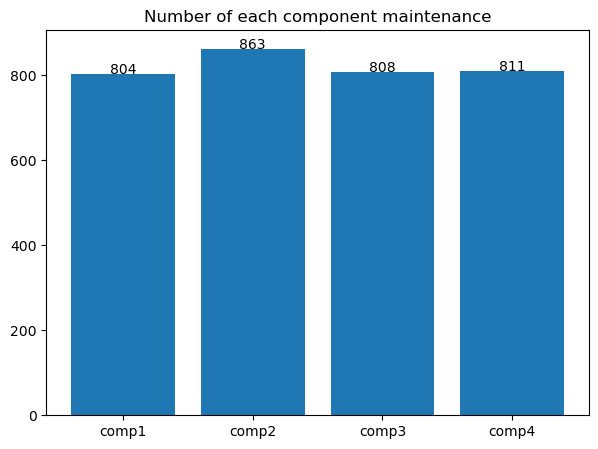

In [21]:
plt.figure(figsize=(7,5))
x, y = df_maint.groupby('comp').count()['machineID'].index, df_maint.groupby('comp').count()['machineID'].values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of each component maintenance')
plt.show()

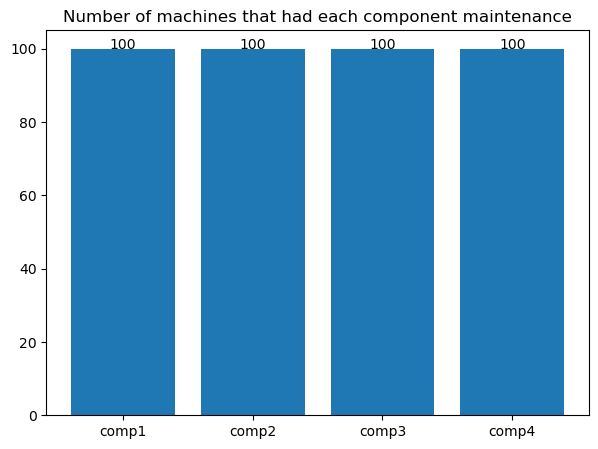

In [22]:
plt.figure(figsize=(7,5))
x, y = df_maint.groupby('comp')['machineID'].nunique().index, df_maint.groupby('comp')['machineID'].nunique().values
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title('Number of machines that had each component maintenance')
plt.show()